In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso , Ridge



# Data Analysis

## UniVariate Analysis

In [77]:

df = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [79]:
df.corr(numeric_only=True)

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


- The age and Car purchase amount has surprisngly high Correlation 

- The Annual Salary and Car Purchase Amount has High Correlation which is expected because Annual Salary is related to buying car ammount

- The net worth and Car Purchase Amount has Slightly High Correlation which is also expected because networth is related to buying a car amount

In [80]:
df.duplicated().sum()


np.int64(0)

- Check if there are any duplicates, but there are no duplicates

### Country Column

In [81]:
count=df['country'].value_counts()
head=df['country'].value_counts().head(10)
print(head)

country
Mauritania    6
Israel        6
Bolivia       6
Kyrgyzstan    5
Samoa         5
Guinea        5
Laos          5
Bhutan        5
Iraq          5
Greenland     5
Name: count, dtype: int64


- Top ten Countries that purchased a car from this store

### Gender Column

In [82]:
count=df['gender'].value_counts()
count

gender
1    253
0    247
Name: count, dtype: int64

In [83]:
df['gender'] = df['gender'].map({1: 'Male', 0: 'Female'})


In [84]:
count=df['gender'].value_counts()
count

gender
Male      253
Female    247
Name: count, dtype: int64

- Changed 1 to Male and 0 Female to make the data less confusing


C:\Users\George Hany\AppData\Local\Temp\ipykernel_32912\324061824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Male','Female'],y=count, palette=sns.color_palette("Paired"))
C:\Users\George Hany\AppData\Local\Temp\ipykernel_32912\324061824.py:1: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.barplot(x=['Male','Female'],y=count, palette=sns.color_palette("Paired"))


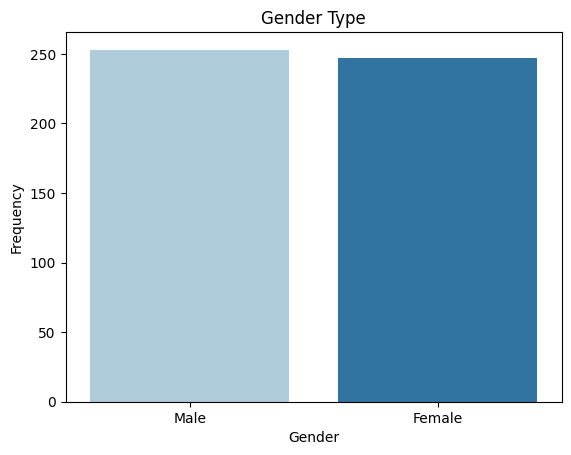

In [85]:
sns.barplot(x=['Male','Female'],y=count, palette=sns.color_palette("Paired"))
plt.title('Gender Type')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

- 1 is for men and 0 is for women

- Men are slightly more than women

### Age Column

In [86]:
count=df['age'].describe()
count

count    500.000000
mean      46.241674
std        7.978862
min       20.000000
25%       40.949969
50%       46.049901
75%       51.612263
max       70.000000
Name: age, dtype: float64

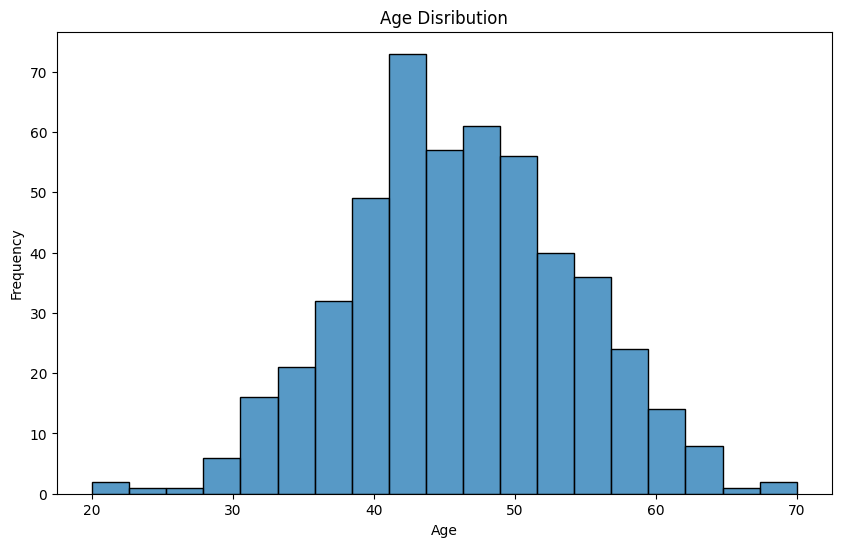

In [87]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'])
plt.title("Age Disribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- Average Age is 46


- Check for outliers

In [88]:
Q1= df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

67.60570433625
24.956527026250004


- There is not much outliers in this graph but as we can see, people with age less than 24 and more than 67 are considered outliers because mainly people between 40-50 are the most buyers

In [89]:
df[df["age"]<24]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
37,Uriel Bradshaw,ultrices@Integersemelit.com,Turkey,Male,22.000387,43131.78411,10917.14094,326742.7352,10092.22509
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),Male,20.000000,70467.29492,100.00000,494606.6334,28645.39425


In [90]:
df[df["age"]>67]


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
194,Gil Sanders,eu.ultrices@cursuset.net,Haiti,Female,70.000000,52323.24480,12438.856480,346555.1716,56229.41270
236,Tate C. Foster,dignissim.magna@Maurisvel.edu,Viet Nam,Male,69.569306,41434.51258,6810.555606,252220.2937,47009.57741


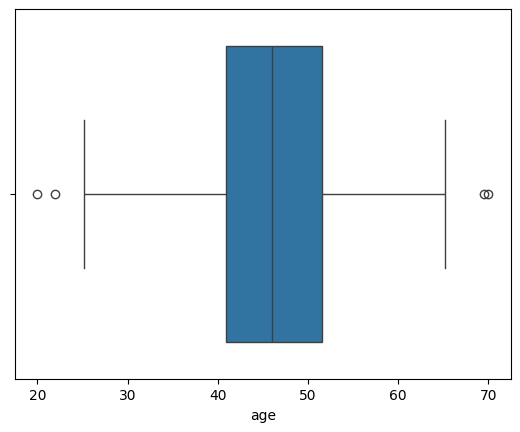

In [91]:
sns.boxplot(data=df,x='age')
plt.show()

- Those are the 4 Purchasers who are considered outliers by the regularity of the buyers 

In [92]:
not_outlier_df=df[(df['age']>Lower)&(df['age']<upper)]
not_outlier_df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,Female,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,Male,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,Male,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,Male,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


- All of this buyers follow the trend and there are no outliers 

### Annual Salary Column

In [93]:
df['annual Salary'].describe()

count       500.000000
mean      62127.239608
std       11703.378228
min       20000.000000
25%       54391.977195
50%       62915.497035
75%       70117.862005
max      100000.000000
Name: annual Salary, dtype: float64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_32912\336017073.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['annual Salary'], palette="husl")


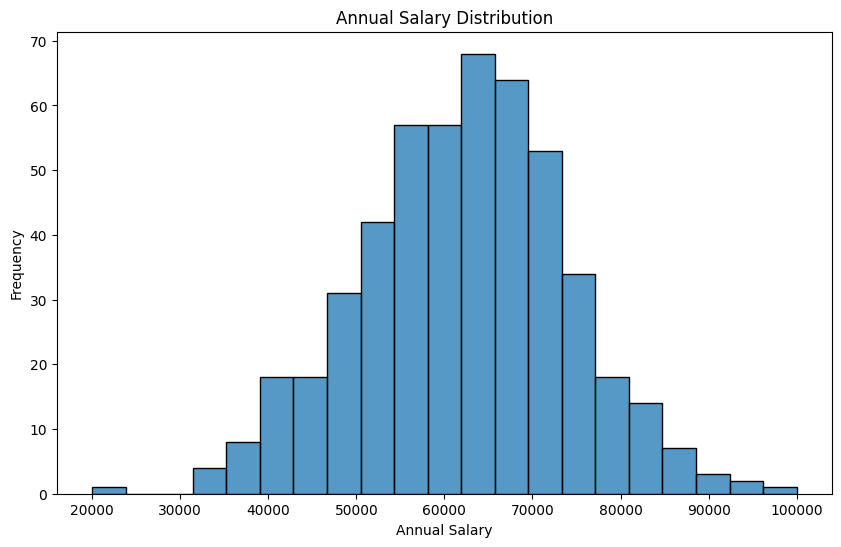

In [94]:
plt.figure(figsize=(10,6))

sns.histplot(df['annual Salary'], palette="husl")
plt.title('Annual Salary Distribution')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()


- Most people who purchase car from this store averages between 50K-75K which means they target the people who has this range of annual salary which mean their cars are average price and not to expensive

In [95]:
Q1= df['annual Salary'].quantile(0.25)
Q3=df['annual Salary'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

93706.68922
30803.149979999995


In [96]:
df[df['annual Salary']>93706]


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,Male,46.124036,100000.0,17452.92179,188032.0778,58350.31809


In [97]:
df[df['annual Salary']<30803]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,Suriname,Male,32.094081,20000.0,14261.80773,579181.6552,12895.71468


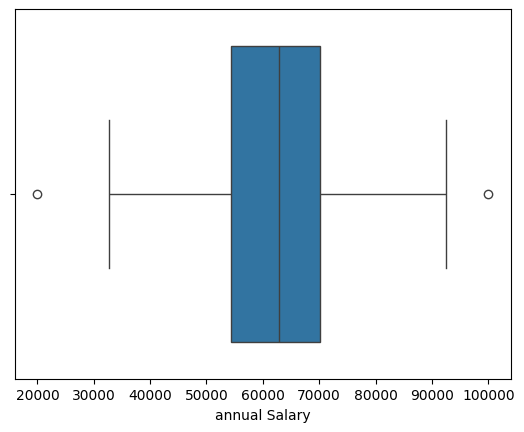

In [98]:
sns.boxplot(data=df,x='annual Salary')
plt.show()

In [99]:
not_outlier_df=df[(df['annual Salary']>Lower)&(df['annual Salary']<upper)]
not_outlier_df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,Female,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,Male,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,Male,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,Male,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


- Only 2 customers are not following the trend in case of Annual Salary

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    object 
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


### Credit Card Debt Column

In [101]:
df["credit card debt"].describe()

count      500.000000
mean      9607.645049
std       3489.187973
min        100.000000
25%       7397.515792
50%       9655.035568
75%      11798.867487
max      20000.000000
Name: credit card debt, dtype: float64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_32912\1128348273.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['credit card debt'], palette="husl")


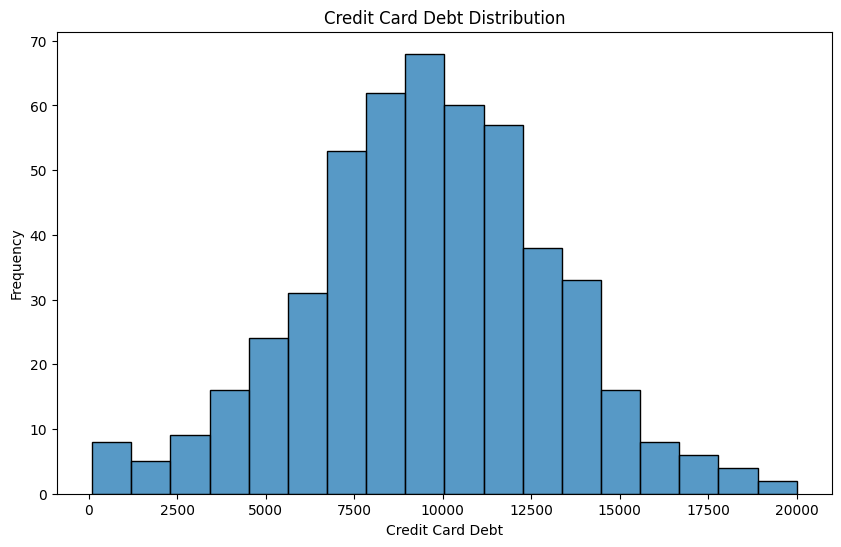

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(df['credit card debt'], palette="husl")
plt.title('Credit Card Debt Distribution')
plt.xlabel('Credit Card Debt')
plt.ylabel('Frequency')
plt.show()


- Average Credit Card Debt is $9600

In [103]:
Q1= df['credit card debt'].quantile(0.25)
Q3=df['credit card debt'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

18400.895031125
795.4882481250006


In [104]:
df[df['credit card debt']>18400]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
221,Laurel H. Snow,dui.Suspendisse.ac@tacitisociosqu.org,Andorra,Male,36.408033,69494.69783,20000.00000,335809.6171,37303.56701
253,Shaeleigh M. Mckenzie,diam.lorem.auctor@estmollisnon.net,Christmas Island,Male,46.205241,55434.04046,18693.14652,316906.6441,37093.92033
440,Ora,bibendum.Donec.felis@liberoestcongue.org,Uruguay,Male,39.665657,57777.15558,19692.91262,601210.2803,41147.46679


In [105]:
df[df['credit card debt']<795]


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
239,Zane I. Boone,blandit@Cum.edu,Bahrain,Male,45.138518,62939.12851,632.052852,455589.7973,44434.98419
290,Abigail X. Lindsey,dui@nondui.ca,Croatia,Female,63.414531,46549.16329,640.045378,626163.8320,55543.38497
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),Male,20.000000,70467.29492,100.000000,494606.6334,28645.39425
488,Neville,felis.Nulla@mi.ca,Mauritania,Female,41.705059,61575.95020,594.804949,497197.2640,41984.62412


- Those 7 customers are the outliers of the Credit Card Debt who do not follow the trend of having credit card debt

[]

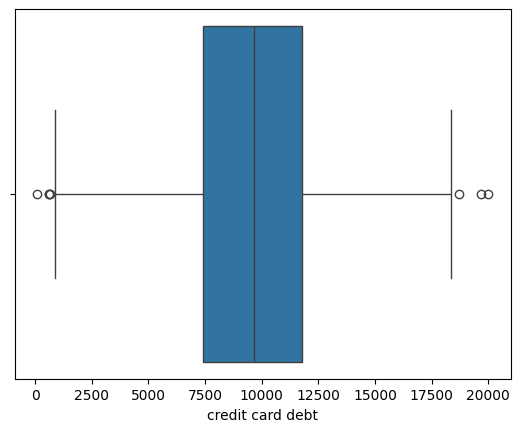

In [106]:
sns.boxplot(data=df,x='credit card debt')
plt.plot()

In [107]:
not_outlier_df=df[(df['credit card debt']>Lower)&(df['credit card debt']<upper)]
not_outlier_df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,Female,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,Male,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,Male,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,Male,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


### Net worth Column

In [108]:
df['net worth'].describe()

count        500.000000
mean      431475.713625
std       173536.756340
min        20000.000000
25%       299824.195900
50%       426750.120650
75%       557324.478725
max      1000000.000000
Name: net worth, dtype: float64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_32912\1638153576.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['net worth'], palette="husl")


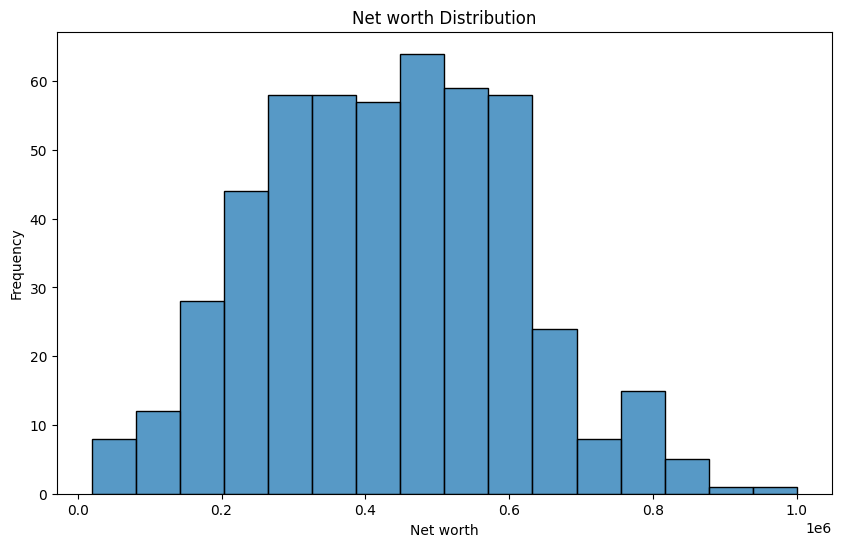

In [109]:
plt.figure(figsize=(10,6))
sns.histplot(df['net worth'], palette="husl")
plt.title('Net worth Distribution')
plt.xlabel('Net worth')
plt.ylabel('Frequency')
plt.show()

- Average Net worth is $430000

In [110]:
Q1= df['net worth'].quantile(0.25)
Q3=df['net worth'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

943574.9029625
-86426.22833749995


In [111]:
df[df['net worth']>943574]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
315,"Cameron, Kimberley P.",nec.tellus@lacinia.co.uk,Namibia,Male,55.017566,83333.81054,9874.075327,1000000.0,80000.0


- The only Outlier or the only networth that does not follow the trend of customers in this shop

[]

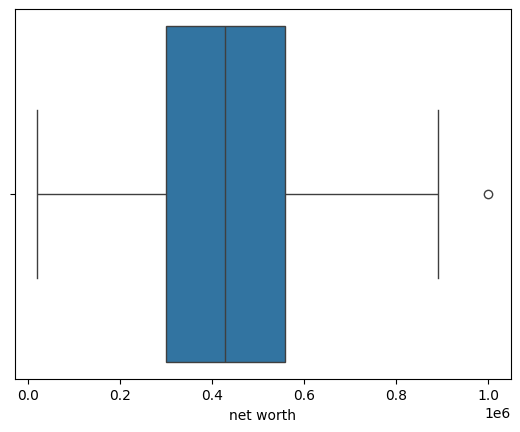

In [112]:
sns.boxplot(data=df,x='net worth')
plt.plot()

In [113]:
not_outlier_df=df[(df['net worth']>Lower)&(df['net worth']<upper)]
not_outlier_df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,Female,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,Male,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,Male,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,Male,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


- Those are all the products who follow the trend

### Car Purchase Amount Column

In [114]:
df['car purchase amount'].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_32912\1158123799.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['car purchase amount'], palette="husl")


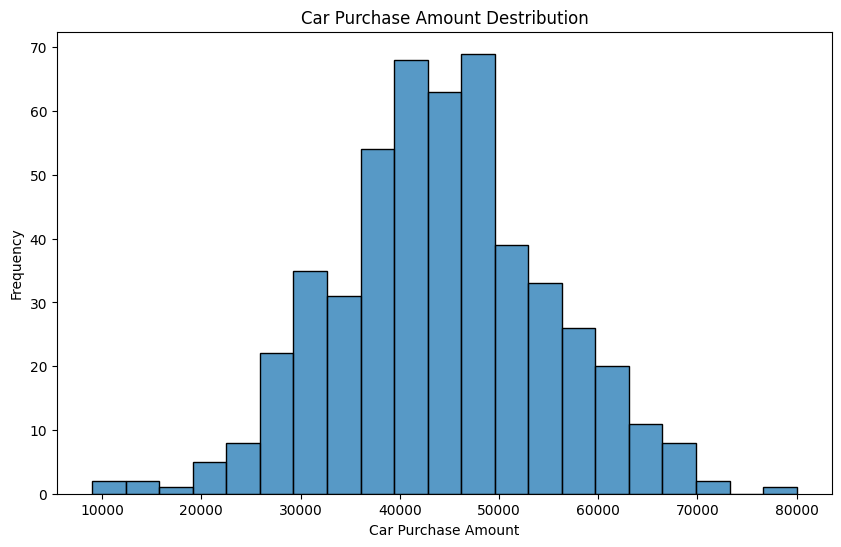

In [115]:
plt.figure(figsize=(10,6))
sns.histplot(df['car purchase amount'], palette="husl")
plt.title('Car Purchase Amount Destribution')
plt.xlabel('Car Purchase Amount')
plt.ylabel('Frequency')
plt.show()


- Average of Car purchase amount $44209

In [116]:
Q1= df['car purchase amount'].quantile(0.25)
Q3=df['car purchase amount'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

71691.92973375
17192.67582375


In [117]:
df[df['car purchase amount']>71691]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
315,"Cameron, Kimberley P.",nec.tellus@lacinia.co.uk,Namibia,Male,55.017566,83333.81054,9874.075327,1000000.0,80000.0


In [118]:
df[df['car purchase amount']<17192]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
37,Uriel Bradshaw,ultrices@Integersemelit.com,Turkey,Male,22.000387,43131.78411,10917.140940,326742.7352,10092.22509
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,Suriname,Male,32.094081,20000.00000,14261.807730,579181.6552,12895.71468
270,Urielle M. Contreras,elit.Aliquam.auctor@dolor.org,Bolivia,Female,35.375156,33422.99683,8570.611562,211168.6293,12536.93842
453,Tatyana,sem@parturientmontesnascetur.net,Norfolk Island,Female,25.179893,45092.74073,11380.092880,158758.3577,9000.00000


[]

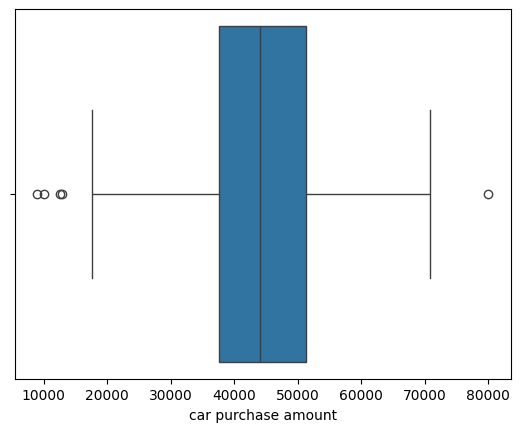

In [119]:
sns.boxplot(data=df,x='car purchase amount')
plt.plot()

- Those 5 Amounts of purchase were lower or higher than usual price of cars that were usually sold in the shop

## MultiVariate Analysis

In [120]:
df.describe()

,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [154]:
df.groupby(['country'])['car purchase amount'].mean().head(10)

country
Afghanistan       56017.850725
Algeria           47752.068330
American Samoa    24221.999370
Andorra           39239.699943
Angola            44498.000075
Anguilla          48188.747250
Antarctica        47059.248160
Argentina         48663.689010
Armenia           45037.148868
Aruba             33131.527340
Name: car purchase amount, dtype: float64

- The Country Afghanistan have the most car purchased amount 

In [165]:
df.groupby(['annual Salary'])['car purchase amount'].mean().head()

annual Salary
20000.00000    12895.71468
32697.98161    28463.64326
33422.99683    12536.93842
34154.77654    26499.31418
35069.41886    31978.97990
Name: car purchase amount, dtype: float64

# Machine Learning

In [121]:
#df.drop(columns=['customer name','customer e-mail','country','gender','credit card debt'],inplace=True)


In [122]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [123]:
X=df.iloc[:,:-1]
X

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Female,41.851720,62812.09301,11609.380910,238961.2505
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Female,40.870623,66646.89292,9572.957136,530973.9078
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Male,43.152897,53798.55112,11160.355060,638467.1773
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Male,58.271369,79370.03798,14426.164850,548599.0524
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Male,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,Female,41.462515,71942.40291,6995.902524,541670.1016
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,Male,37.642000,56039.49793,12301.456790,360419.0988
497,Pearl,penatibus.et@massanonante.com,Philippines,Male,53.943497,68888.77805,10611.606860,764531.3203
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,Male,59.160509,49811.99062,14013.034510,337826.6382


In [124]:
X= df.loc[:,['age','annual Salary','net worth']]
X

,age,annual Salary,net worth
0,41.851720,62812.09301,238961.2505
1,40.870623,66646.89292,530973.9078
2,43.152897,53798.55112,638467.1773
3,58.271369,79370.03798,548599.0524
4,57.313749,59729.15130,560304.0671
...,...,...,...
495,41.462515,71942.40291,541670.1016
496,37.642000,56039.49793,360419.0988
497,53.943497,68888.77805,764531.3203
498,59.160509,49811.99062,337826.6382


In [125]:
y=df.iloc[:,3:4]
y

,gender
0,Female
1,Female
2,Male
3,Male
4,Male
...,...
495,Female
496,Male
497,Male
498,Male


In [126]:
y=df.iloc[:, -1]
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [127]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [128]:
scalar=MinMaxScaler()
X= scalar.fit_transform(X)
X


array([[0.4370344 , 0.53515116, 0.22342985],
       [0.41741247, 0.58308616, 0.52140195],
       [0.46305795, 0.42248189, 0.63108896],
       ...,
       [0.67886994, 0.61110973, 0.75972584],
       [0.78321017, 0.37264988, 0.3243129 ],
       [0.53462305, 0.51713347, 0.45198622]])

In [129]:

y= scalar.fit_transform(y.values.reshape(-1,1))
y

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

### random state = seed

1. Read Data
2. EDA
3. Presprocessing 
    - Drop unneeded Columns
    - Define Features X and target y
    - scalling (MinMinScalar | StandardScalar)
    - Encoding (LabelEncoder | OneHotEncoder)
    -Split Data into train, test (train_test_split)
    
4- ML Model

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [131]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [132]:
y_pred=model.predict(X_test)

In [133]:
print(mean_squared_error(y_test,y_pred))

4.063759553699414e-10


In [134]:
model.score(X_train,y_train)

0.9999999811846746

In [135]:
model.score(X_test,y_test)

0.9999999810273109

In [136]:
model2=SGDRegressor()
model2.fit(X_train,y_train)

c:\Users\George Hany\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [137]:
y_pred=model2.predict(X_test)

In [138]:
print(mean_squared_error(y_test,y_pred))


0.0100129897014611


In [139]:
model2.score(X_train,y_train)


0.5304431511221768

In [140]:
model2.score(X_test,y_test)


0.5325182544255103

In [141]:
model3=Lasso()
model3.fit(X_train,y_train)

Lasso()

In [142]:
y_pred=model3.predict(X_test)

In [143]:
print(mean_squared_error(y_test,y_pred))

0.021763931208826963


In [144]:
model3.score(X_train,y_train)

0.0

In [145]:
model3.score(X_test,y_test)

-0.016104166229284456

In [146]:
model4=Ridge()
model4.fit(X_train,y_train)

Ridge()

In [147]:
y_pred=model4.predict(X_test)

In [148]:
print(mean_squared_error(y_test,y_pred))

0.0001748560742836093


In [149]:
model4.score(X_train,y_train)

0.9919222123890137

In [150]:
model4.score(X_test,y_test)

0.9918364019870632